In [ ]:
!pip install -r requirements.txt

In [1]:
# -----------------------------------------------------------
# Dissertation Project: An Empirical Study on the Classification 
# Performance of Deep Learning vs. Gradient Boosting 
# on heterogeneous tabular data
#
# This module provides functions for running and analyzing results from the,
# XGBoost model. It includes methods for model training, 
# performance evaluation, and interpretation of results.
#
# Author: Adam Mabrouk
# Supervisor: Ben Ralph
# Institution: University of Bath
# Created on: 01/01/2024
# Version: 1.0
# -----------------------------------------------------------
# Library Versions Used
# ----------------------
# Python version: 3.11.5 
# tensorflow version: 2.15.0

import numpy as np
from time import time
import optuna
from matplotlib import pyplot as plt
from model_training import ModelTraining

from Results import ModelResults
from data_loader import load_data
from xgboost_model import create_xgboost, optuna_xgboost_params

2024-02-13 11:26:29.269169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
random_seed = np.random.randint(1,1000)
random_seed

111

- **Operating this notebook**

    - `Select dataset (Currently set to 5k)`
    - `Copy and past parameters from manual or optuna below`
    - `Select optuna to True to run or False to use manual (Currently set to True)`
    - `Uncomment to record results below (Currently set to not save results) If saved they are saved directly in the model_results_for_further_testing folder`

In [3]:
"""Select dataset"""

root_path = "."
data_source = "datasets"

# choose dataset

data = 'lending_club_dataset'
# data = 'heloc_dataset'
# data = 'adult_income_dataset'
folder_name = data
subset_size = 5000 

X_train, y_train, X_val, y_val, X_test, y_test = load_data(root_path, data_source, folder_name, subset_size)

In [4]:
"""Manual parameters with and without early stopping"""

# HELOC
# Using predefined best parameters:
#   seed: 208
#   max_depth: 3
#   learning_rate: 0.01
#   n_estimators: 30
#   gamma: 0.5
#   min_child_weight: 4
#   subsample: 0.4
#   colsample_bytree: 0.5
#   reg_alpha: 2.48e-06
#   reg_lambda: 5.91e-06

# adult income
# Using predefined best parameters:
#   seed: 330
#   max_depth: 2
#   learning_rate: 0.01
#   n_estimators: 30
#   gamma: 0.5
#   min_child_weight: 4
#   subsample: 0.4
#   colsample_bytree: 0.5
#   reg_alpha: 2.48e-06
#   reg_lambda: 5.91e-06

# Lending club
# Using predefined best parameters:
#   seed: 200
#   max_depth: 3
#   learning_rate: 0.01
#   n_estimators: 30
#   gamma: 0.5
#   min_child_weight: 5
#   subsample: 0.4
#   colsample_bytree: 0.4
#   reg_alpha: 2.48e-06
#   reg_lambda: 5.91e-06

'Manual parameters with and without early stopping'

In [5]:
"""Optuna parameters with early stopping"""
# optuna for HELOC
# Best Trial ID: 15
# Best Trial Value (Performance Metric): 0.7738084069098188
# Optimal Hyperparameters:
#   seed: 649
#   max_depth: 7
#   learning_rate: 0.012084121618399401
#   gamma: 0.0007331175396306502
#   min_child_weight: 3
#   subsample: 0.7994753086105062
#   colsample_bytree: 0.5116734378813674
#   reg_alpha: 7.539235265122282e-07
#   reg_lambda: 2.209471929893182e-07

# optuna adult income
# Best Trial ID: 20
# Best Trial Value (Performance Metric): 0.7615628514250803
# Optimal Hyperparameters:
#   seed: 303
#   max_depth: 6
#   learning_rate: 0.02916099752877134
#   gamma: 3.126186315640335e-06
#   min_child_weight: 2
#   subsample: 0.9042884360791335
#   colsample_bytree: 0.5900179804839674
#   reg_alpha: 0.00018096585286761483
#   reg_lambda: 0.8682144243773762

# Lending club
# Best Trial ID: 28
# Best Trial Value (Performance Metric): 0.8961381408185157
# Optimal Hyperparameters:
#   seed: 929
#   max_depth: 5
#   learning_rate: 0.0119119506108145
#   gamma: 1.9121436284064003e-05
#   min_child_weight: 4
#   subsample: 0.5860568966158904
#   colsample_bytree: 0.8986956990246572
#   reg_alpha: 0.0003862120920360695
#   reg_lambda: 8.686837643995769e-07

'Optuna parameters with early stopping'

In [6]:
use_optuna = True # True or False
checkpoint_name = "xgboost"
log_dir = f"logs/xgboost/{time()}"
create_model_function = create_xgboost 

seed = random_seed
epochs = 30 
verbose = 1
n_trials = 20 # Optuna

# Last parameters used Lending club
best_params = {
            "seed": seed, 
            "max_depth": 8,
            "learning_rate": 0.0023, #This learning rate is for the timed run 0.01,
            "n_estimators": 30,
            "gamma": 0.5,
            "min_child_weight": 4,
            "subsample": 0.4, # for timed run, "subsample": 0.2,colsample_bytree": 0.2
            "colsample_bytree": 0.2,
            "reg_alpha": 0.00000248,
            "reg_lambda": 0.00000591}

params = optuna_xgboost_params if use_optuna else best_params

model_training = ModelTraining(seed,
                               use_optuna, 
                               checkpoint_name, 
                               log_dir, 
                               create_model_function,
                               epochs, 
                               verbose, 
                               n_trials, 
                               params, "XGBoost")

model, history, final_training_time = model_training.train_and_evaluate(X_train, 
                                                         y_train,
                                                         X_val, 
                                                         y_val)

Best params: {'seed': 111, 'max_depth': 8, 'learning_rate': 0.0023, 'n_estimators': 30, 'gamma': 0.5, 'min_child_weight': 4, 'subsample': 0.4, 'colsample_bytree': 0.2, 'reg_alpha': 2.48e-06, 'reg_lambda': 5.91e-06}
[0]	validation_0-logloss:0.69271	validation_0-aucpr:0.67676	validation_1-logloss:0.68537	validation_1-aucpr:0.85463
[1]	validation_0-logloss:0.69235	validation_0-aucpr:0.73963	validation_1-logloss:0.68517	validation_1-aucpr:0.85463
[2]	validation_0-logloss:0.69174	validation_0-aucpr:0.80039	validation_1-logloss:0.68484	validation_1-aucpr:0.84157
[3]	validation_0-logloss:0.69144	validation_0-aucpr:0.82321	validation_1-logloss:0.68474	validation_1-aucpr:0.84788
[4]	validation_0-logloss:0.69093	validation_0-aucpr:0.85416	validation_1-logloss:0.68437	validation_1-aucpr:0.85444
[5]	validation_0-logloss:0.69057	validation_0-aucpr:0.86258	validation_1-logloss:0.68418	validation_1-aucpr:0.86533
[6]	validation_0-logloss:0.69000	validation_0-aucpr:0.88380	validation_1-logloss:0.68388	

In [27]:
import xgboost as xgb

bst = xgb.train(params, train, num_boost_round=10)

print("Number of boosting rounds (trees):", bst.num_boost_round())

print("Number of features:", bst.feature_names)

bst = xgb.XGBClassifier(n_estimators=100, max_depth=3).fit(X_train, y_train)

print("Number of trees (n_estimators):", bst.get_params()['n_estimators'])
print("Max depth of trees:", bst.get_params()['max_depth'])

NameError: name 'dtrain' is not defined

In [7]:
def display_optimal_hyperparameters(study, use_optuna, best_params=None):
    if use_optuna and study is not None:
        print("Best Trial ID:", study.best_trial.number)
        print("Best Trial Value (Performance Metric):", study.best_trial.value)
        print("Optimal Hyperparameters:")
        for key, value in study.best_trial.params.items():
            print(f"  {key}: {value}")
    elif not use_optuna and best_params is not None:
        print("Using predefined best parameters:")
        for key, value in best_params.items():
            print(f"  {key}: {value}")
    else:
        print("No hyperparameters available to display.")

display_optimal_hyperparameters(model_training.study, use_optuna, best_params)

Using predefined best parameters:
  seed: 111
  max_depth: 8
  learning_rate: 0.0023
  n_estimators: 30
  gamma: 0.5
  min_child_weight: 4
  subsample: 0.4
  colsample_bytree: 0.2
  reg_alpha: 2.48e-06
  reg_lambda: 5.91e-06


              precision    recall  f1-score   support

           0       0.44      0.18      0.25        91
           1       0.84      0.95      0.89       409

    accuracy                           0.81       500
   macro avg       0.64      0.56      0.57       500
weighted avg       0.77      0.81      0.77       500



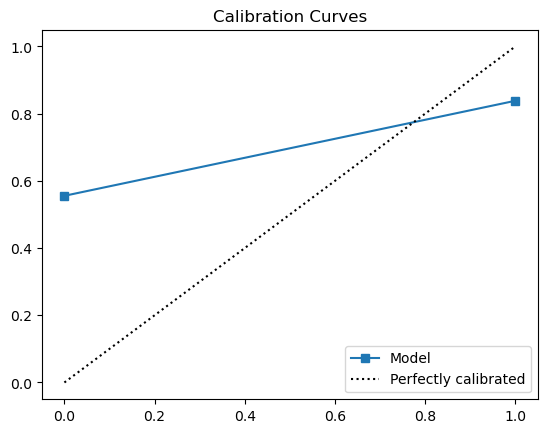

In [8]:
"""Uncomment below to record results"""

# results = ModelResults(model, X_test, y_test, X_train, "XGBoost", folder_name.replace("_dataset", ""), history)

"""This line does not record results"""
results = ModelResults(model, X_test, y_test, X_train, None, None, history)

In [ ]:
results.calibration_curve()

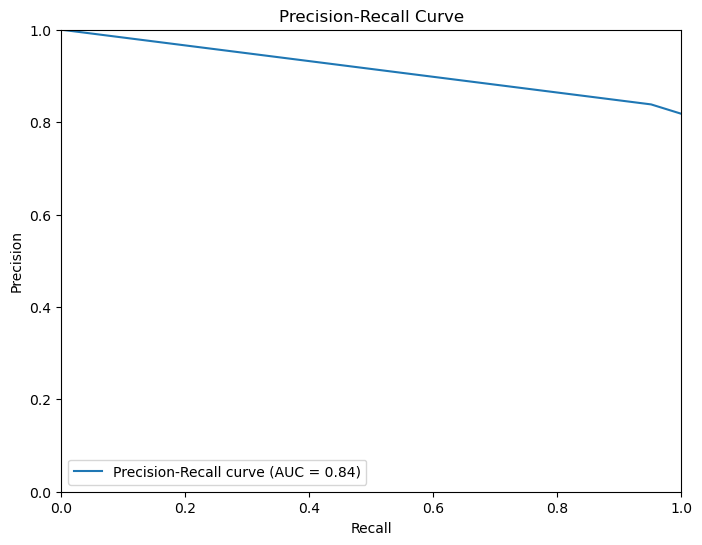

In [9]:
results.auprc()

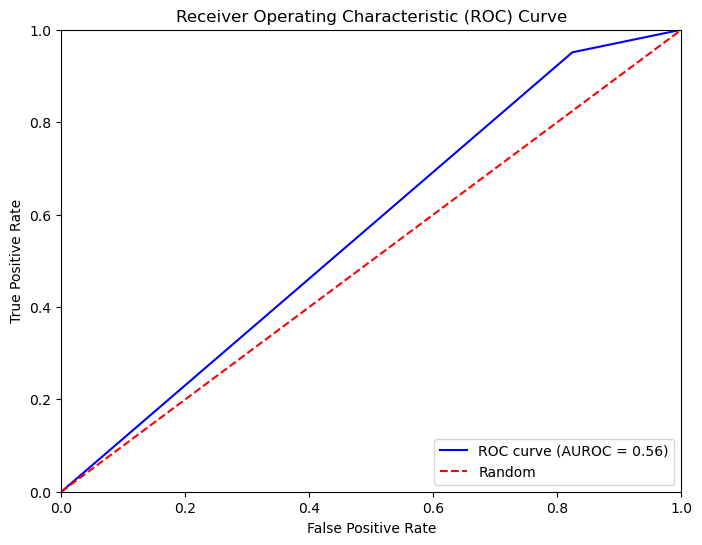

In [10]:
results.auroc()

In [11]:
results.display_metrics()


         Metric Value Percentage
4   Sensitivity  0.95      95.0%
5   Specificity  0.18      18.0%
6      Accuracy  0.81      81.0%
7     Precision  0.84      84.0%
8        Recall  0.95      95.0%
9      F1-score  0.89      89.0%
10       G-Mean  0.41      41.0%


True Negatives:  16
False Positives:  75
False Negatives:  20
True Positives:  389


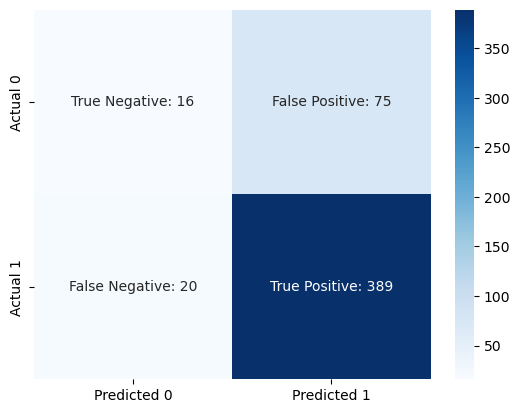

In [12]:
results.confusion_matrix()


In [13]:
inference_time = results.measure_inference_time()

In [14]:
results.save_time_results_to_csv(final_training_time, inference_time) # only use for adult income

Results saved to time.csv


In [15]:
results.display_metrics()

         Metric Value Percentage
4   Sensitivity  0.95      95.0%
5   Specificity  0.18      18.0%
6      Accuracy  0.81      81.0%
7     Precision  0.84      84.0%
8        Recall  0.95      95.0%
9      F1-score  0.89      89.0%
10       G-Mean  0.41      41.0%


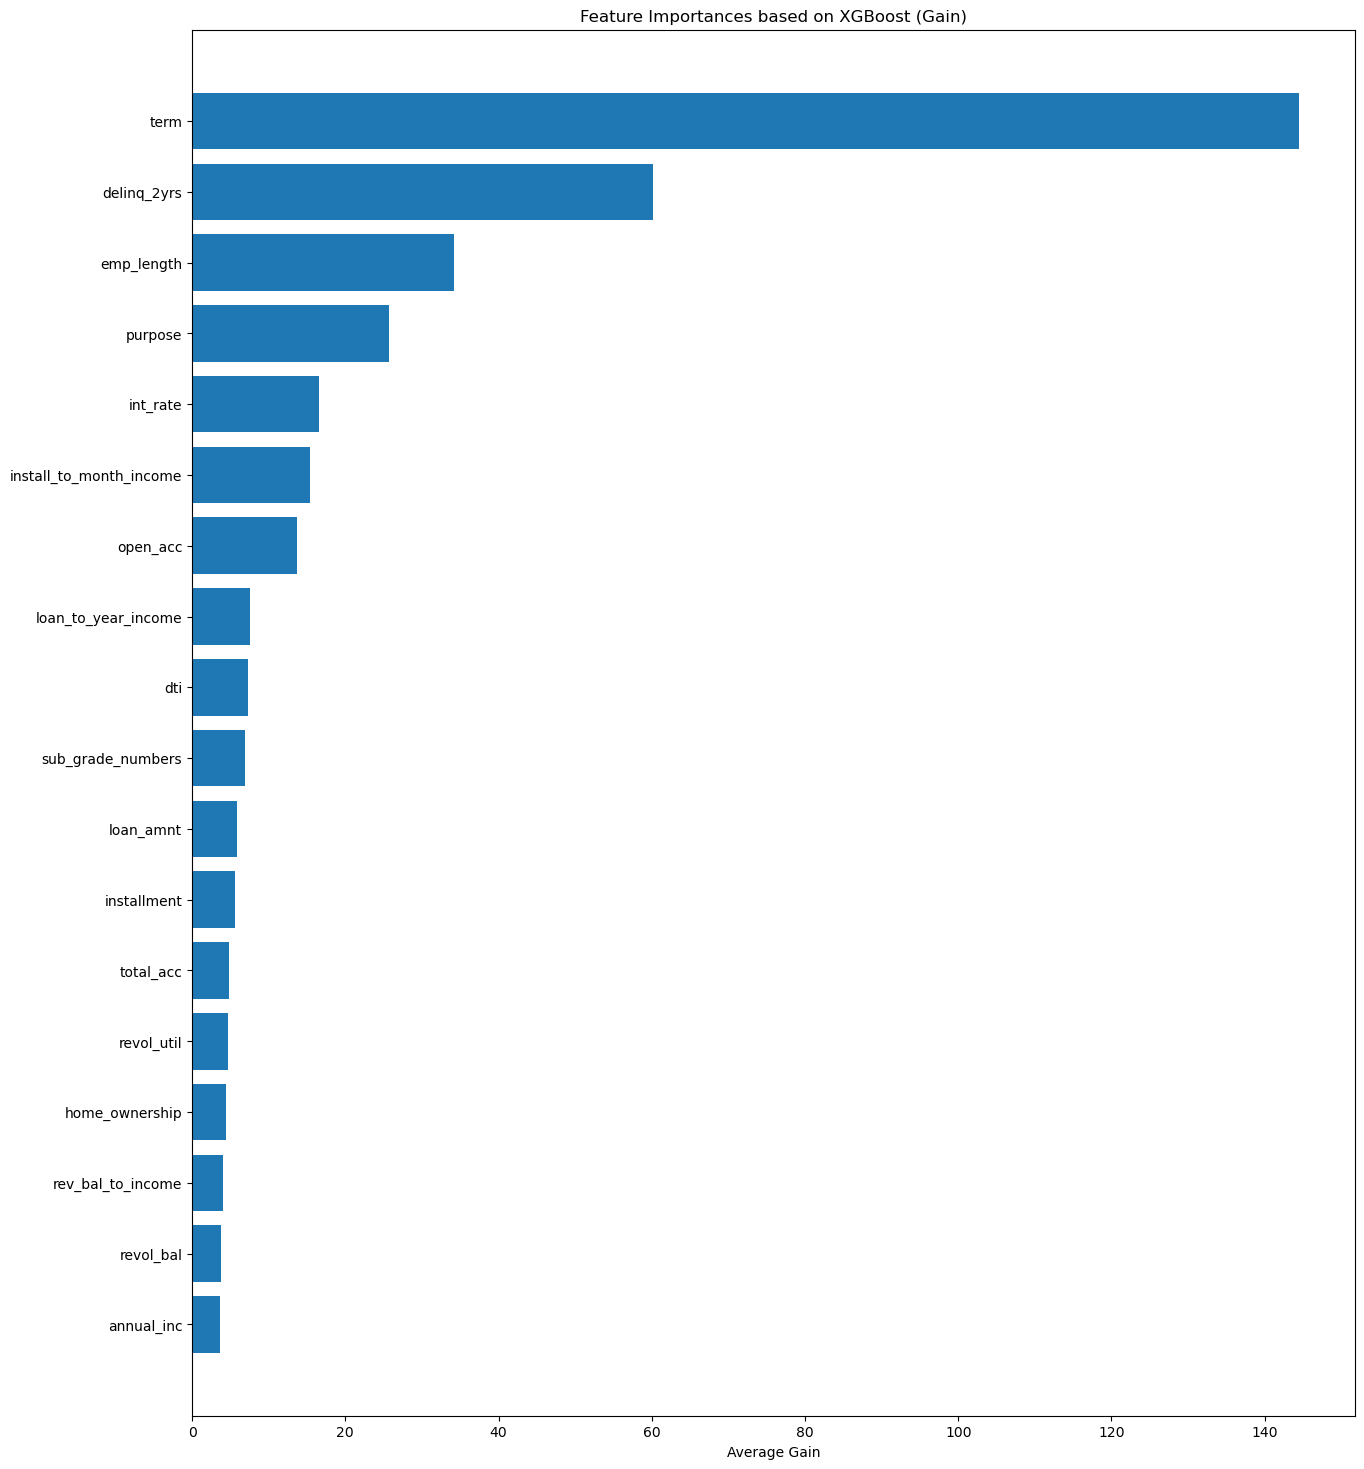

In [16]:
feature_importances = model.get_booster().get_score(importance_type='gain')

sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_importances)

plt.figure(figsize=(15, 18)) # You can adjust the size as needed
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlabel('Average Gain')
plt.title('Feature Importances based on XGBoost (Gain)')
plt.show()

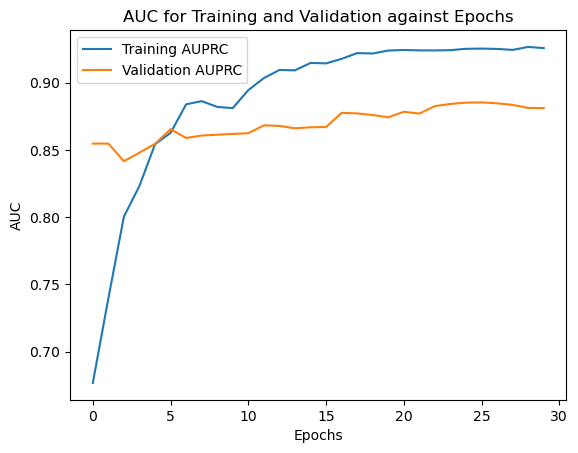

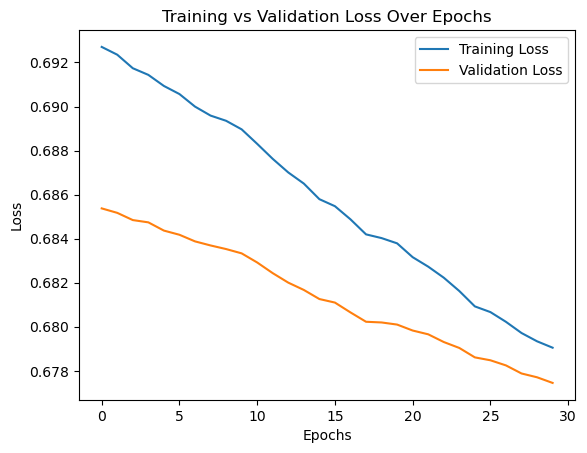

In [17]:
results.model_history()

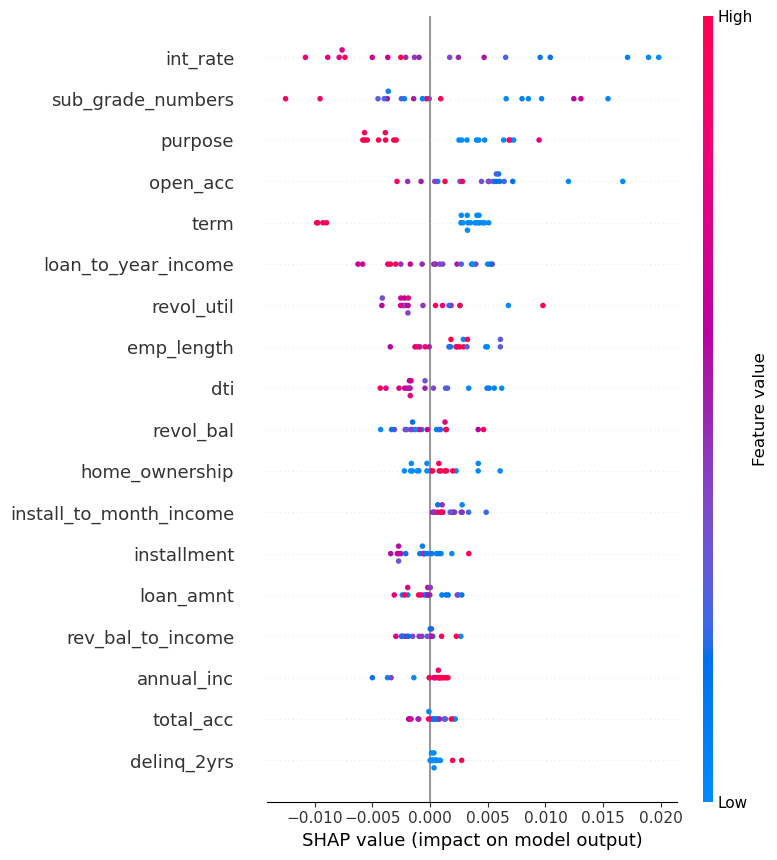

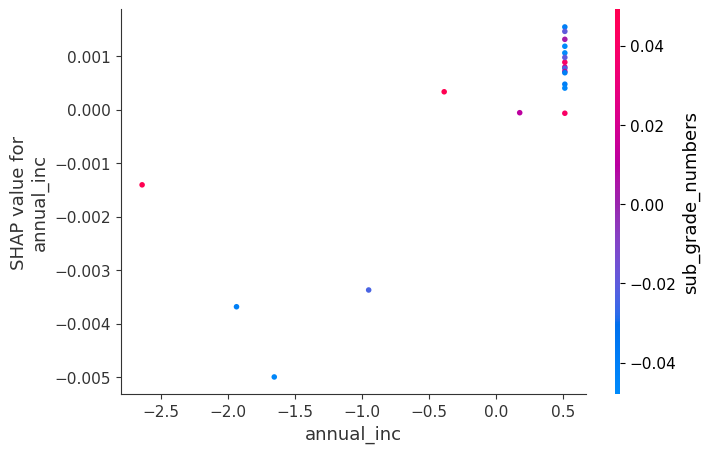

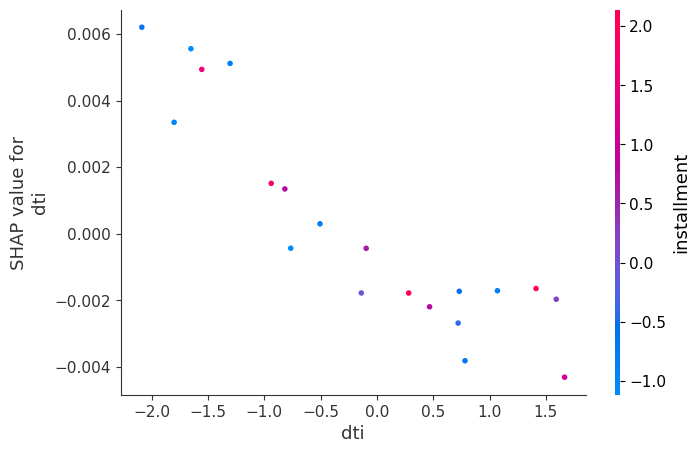

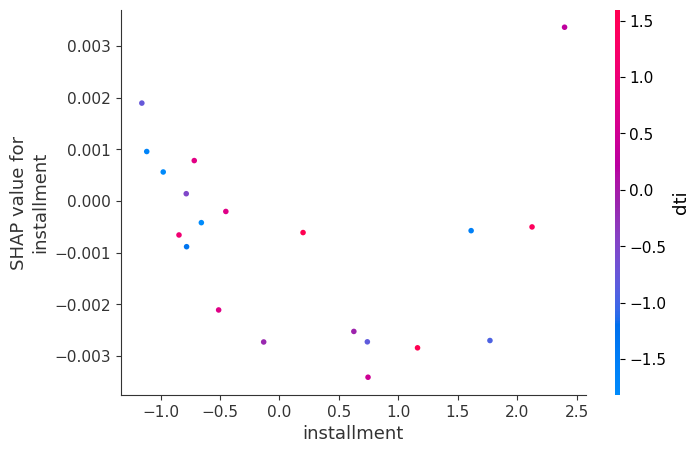

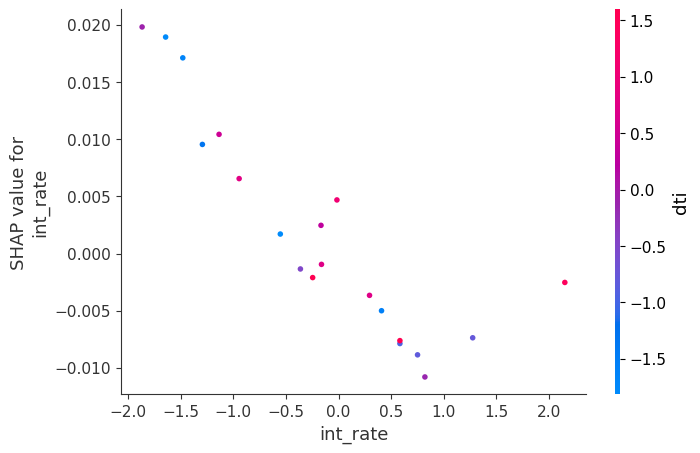

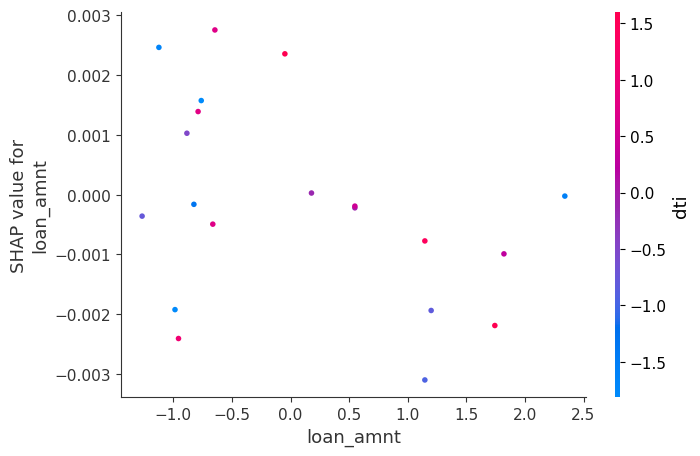

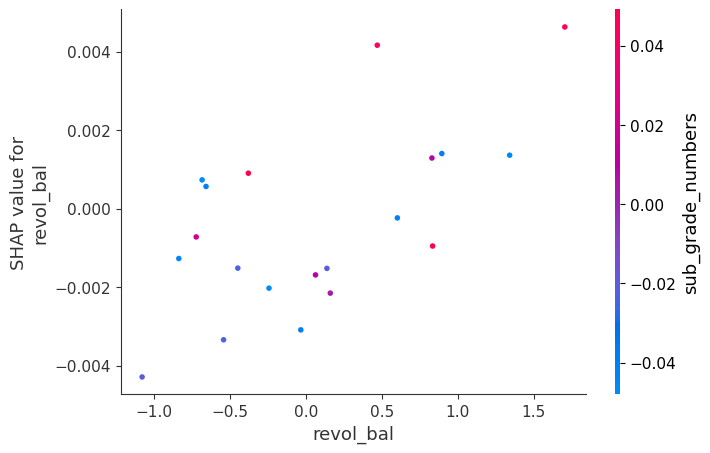

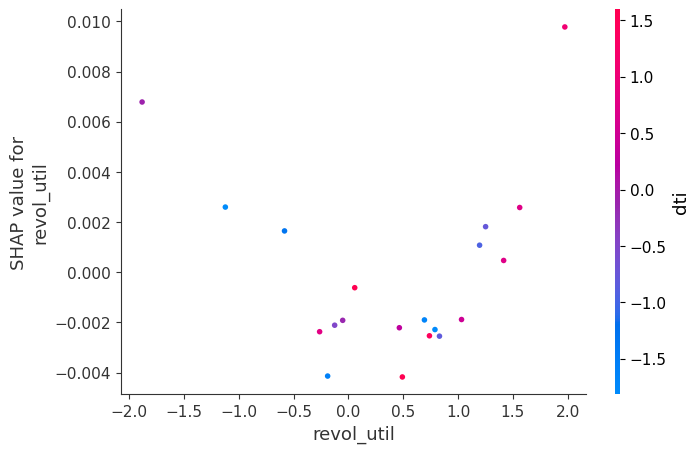

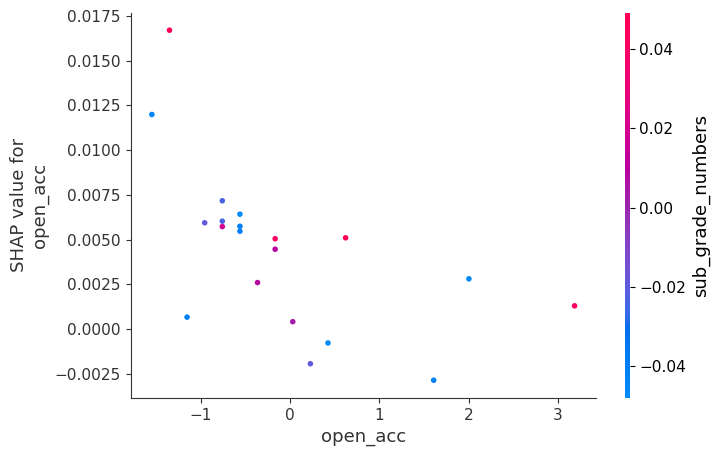

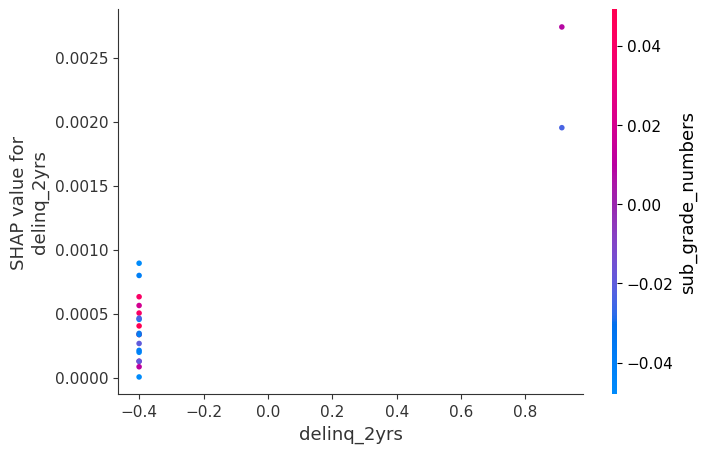

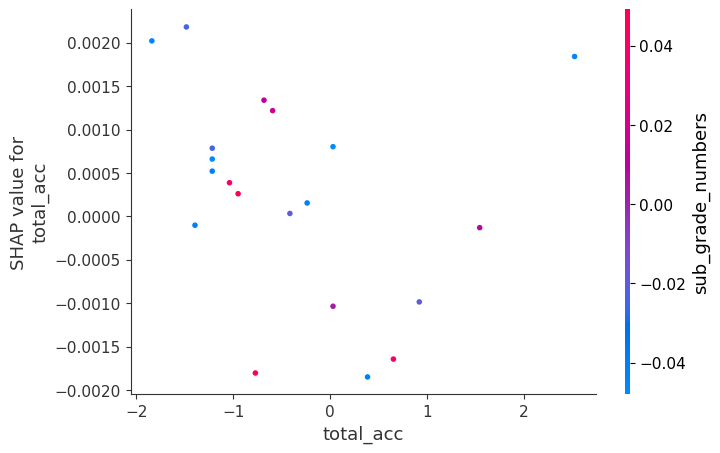

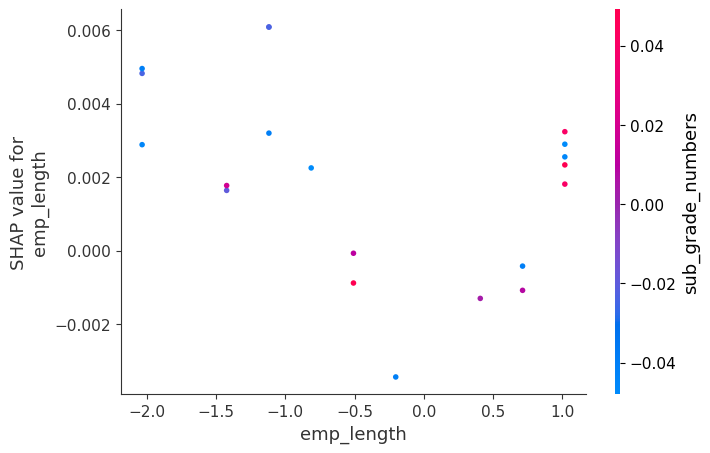

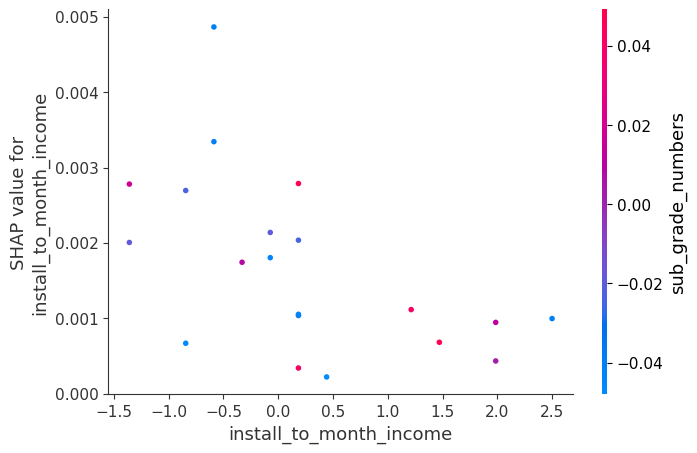

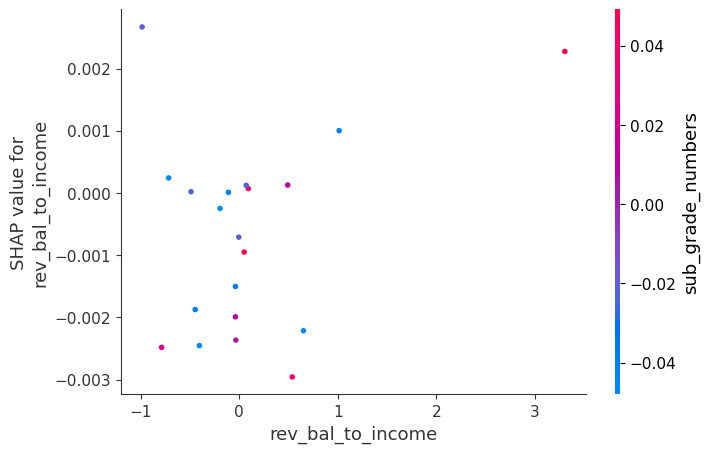

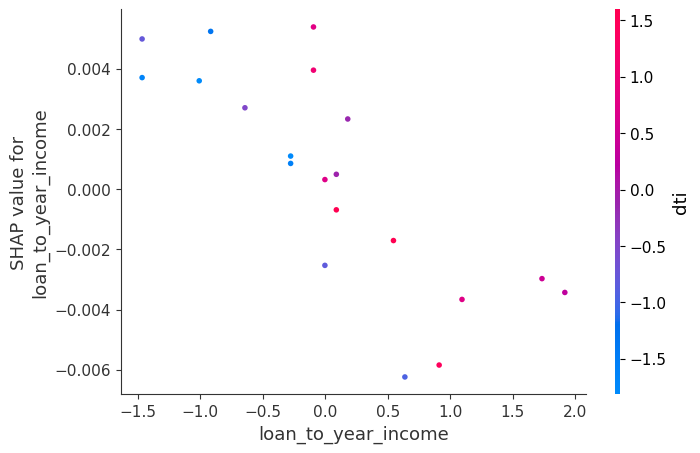

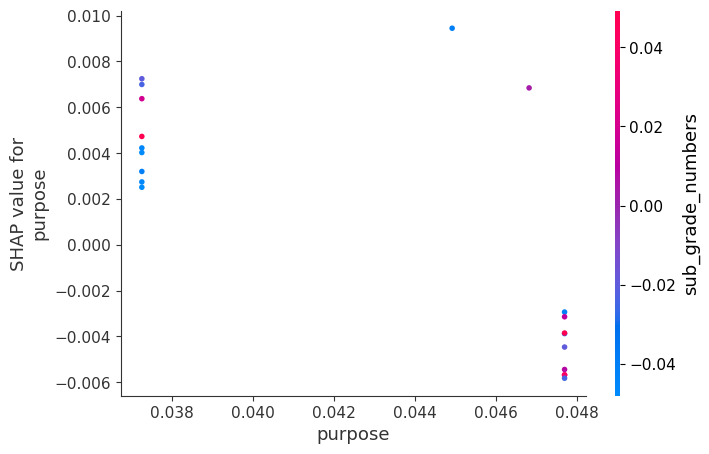

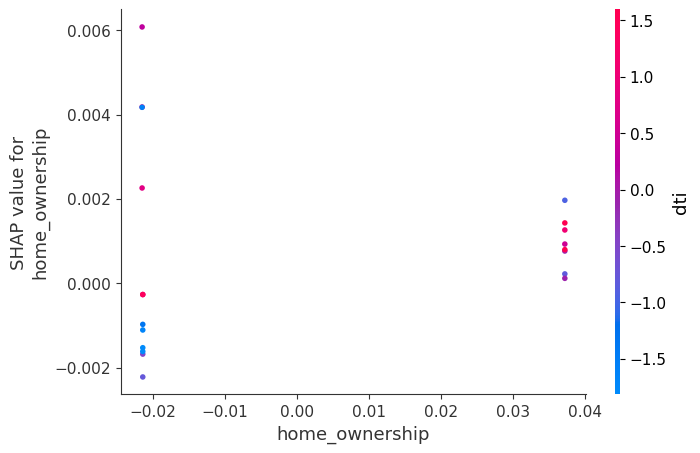

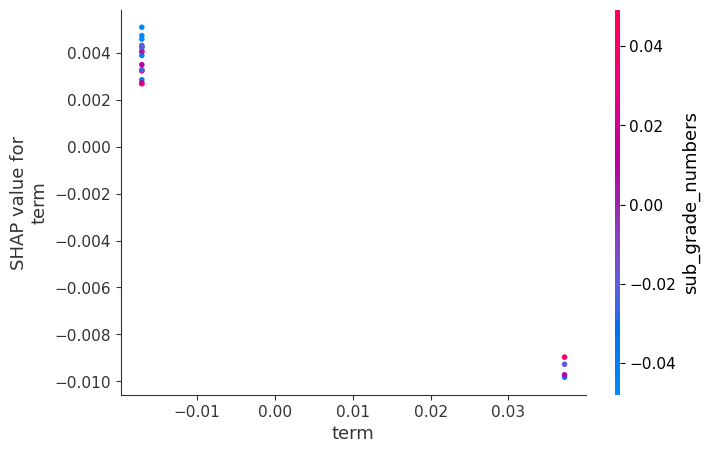

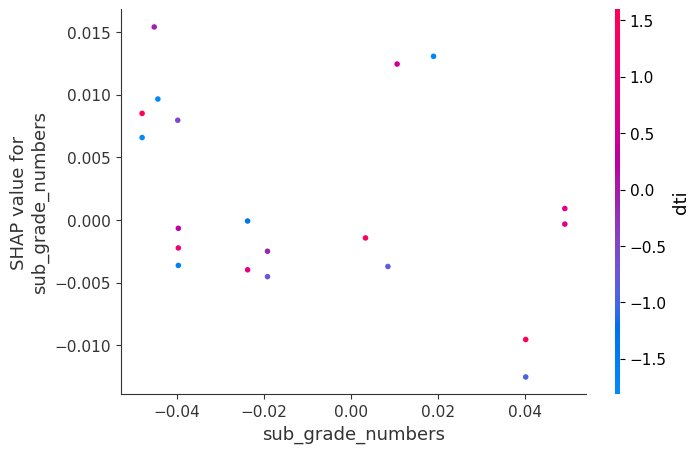

In [18]:
results.xai_shap()
